 
<div style="text-align: center;">
    <img src="https://cdn.pixabay.com/photo/2020/03/14/12/56/corona-4930541_1280.jpg" style="max-width: 600px; width:100%;" />
</div>

# Intro to Python Pandas Data Analysis with live COVID‐19 data

This is a Python Jupyter notebook running in Google Colab. Click on Open in Playground above and login with a Google account to get started.<br>
To run the code, click on each of the [ ] to run the Python cells below in order (they depend on one another, so don't miss any).

`__author__ = 'NJ Reese'`

## Step 1: Reading Data

We will load live COVID-19 data from the [GitHub data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). As the data changes, just load the data again to keep it current. The data is in 3 files for: confirmed cases, deaths, and recovered statistics. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,206133
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,333381
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,271100
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,47219,47219,47219
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104491,104676,104676,104676


In [ ]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7834,7834
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,157,157,157
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1923,1924,1924,1924


In [ ]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Cleaning the Data

The following code replaces the column name Country/Region with just Country and Province/State with State to make it easier to pull out columns using the . operator.  The Province/State column had a bunch of NaN's in it which is how Python marks missing data. We can replace those with blanks. 

In [ ]:
covid_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
covid_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
covid_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
covid_confirmed.rename(columns={'Province/State':'State'}, inplace=True)
covid_deaths.rename(columns={'Province/State':'State'}, inplace=True)
covid_recovered.rename(columns={'Province/State':'State'}, inplace=True)
covid_confirmed.head()


,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205391,205506,205541,205612,205612,205802,205830,205907,206073,206133
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333293,333305,333316,333322,333330,333330,333338,333343,333360,333381
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271041,271050,271057,271061,271061,271079,271082,271090,271096,271100
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,47219,47219,47219
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104491,104491,104676,104676,104676


In [ ]:
covid_confirmed[['State']] = covid_confirmed[['State']].fillna('')
covid_confirmed.fillna(0, inplace=True)

covid_deaths[['State']] = covid_deaths[['State']].fillna('')
covid_deaths.fillna(0, inplace=True)

covid_recovered[['State']] = covid_recovered[['State']].fillna('')
covid_recovered.fillna(0, inplace=True)
covid_deaths.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7833,7833,7834,7834
1,,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,157,157,157
4,,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1923,1923,1924,1924,1924


## 3. Data Access 

You can pull out a certain column with .columname (if it's one word) or ['column name'] for multiword columns from the dataframe. And you can pull out a certain row using ==. For example, here we've pulled out the row where the country equals China.

In [ ]:
covid_confirmed.Country

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country, Length: 289, dtype: object

In [ ]:
covid_confirmed[covid_confirmed.Country == 'China']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1570,1572,1578,1588,1588,1596,1614,1614,1616,1628
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,7922,8354,8941,9691,10547,11520,11520,13840,14788,15493
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,4138,4551,4811,5013,5013,5661,5829,5829,6231,6438
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,5736,5787,5787,5886,5955,6019,6085,6085,6173,6344
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1516,1523,1534,1534,1539,1547,1551,1551,1551,1551
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,28216,29131,30147,31556,32927,34114,35643,37254,39052,40730
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,2361,2364,2366,2379,2384,2386,2395,2395,2400,2411
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,1102,1178,1209,1237,1259,1277,1297,1297,1321,1356
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,9025,9035,9048,9055,9065,9077,9092,9092,9121,9184
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,2182,2182,2182,2182,2182,2182,2767,2767,2783,2801


<font color=red>Now, you try. Pull out the data for the US.</red>

Let's add up the total cases in Chinese states using the sum() function.

In [ ]:
covid_confirmed[covid_confirmed.Country == 'China'].sum()


State       AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Country     ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...
Lat                                                 1085.2923
Long                                                3688.9377
1/22/20                                                   548
                                  ...                        
11/28/22                                              3627131
11/29/22                                              3705990
11/30/22                                              3719252
12/1/22                                               3764783
12/2/22                                               3837220
Length: 1050, dtype: object

We can calculate all the sums and group them by country with the following code which also shows the results for 1 date. <br>
<font color=red>Change the variable yesterday to yesterday's date.</font>

In [ ]:
yesterday = '3/26/20'
confirmed_by_country = covid_confirmed.groupby('Country').sum()
confirmed_yesterday_by_country = confirmed_by_country[yesterday]
confirmed_yesterday_by_country




Country
Afghanistan              80
Albania                 174
Algeria                 367
Andorra                 224
Angola                    4
                       ... 
West Bank and Gaza       84
Winter Olympics 2022      0
Yemen                     0
Zambia                   16
Zimbabwe                  3
Name: 3/26/20, Length: 201, dtype: int64

<font color=red>Do the same (compute the sums using groupby) for the covid_deaths data and save it in the variable deaths_yesterday_by_country.</font> 

Here are the top 5 countries with the most cases. 
<font color=red>Change it to yesterday's date and to show the top 10.</font>

In [ ]:
yesterday = '3/26/20'
confirmed_yesterday_by_country = confirmed_by_country[yesterday]
confirmed_yesterday_by_country.sort_values().tail(5)



Country
Germany    36508
Spain      57786
Italy      80589
China      81781
US         86662
Name: 3/26/20, dtype: int64

We can make a bar plot by country. <font color=red>Change the bar plot to show 20 countries with the most cases</font>.

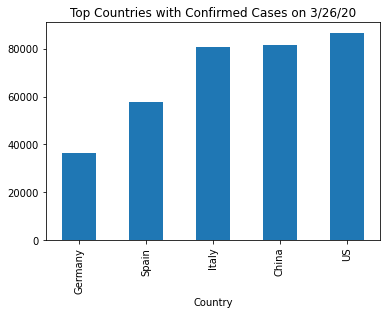

In [ ]:
top_countries = confirmed_yesterday_by_country.sort_values().tail(5)
top_countries.plot.bar(title="Top Countries with Confirmed Cases on " +  yesterday)

<font color=red>Compute the mortality rate by dividing deaths_yesterday_by_country by confirmed_yesterday_by_country and multiplying by 100. Save it in a variable. Then sort and use tail like above and create a bar plot comparing the mortality rates in the top 20 countries. Note that the mortality rate is only for people that get the virus, not for the whole population.</font>

## 4. World Totals

Let's add up all the rows of countries for each date to find the world totals. The sum function can add up all the data for a date (column) for all the countries (rows).



In [ ]:
total_confirmed = covid_confirmed.sum()
total_confirmed



State       Australian Capital TerritoryNew South WalesNor...
Country     AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
Lat                                               5659.272246
Long                                              6366.258024
1/22/20                                                   557
                                  ...                        
11/28/22                                            642024485
11/29/22                                            642749423
11/30/22                                            643274699
12/1/22                                             644001063
12/2/22                                             644733502
Length: 1050, dtype: object

Let's only keep the rows after row 4 since it doesn't make sense to sum the province, country, lat, and long. (Remember rows start numbering at 0).

In [ ]:
total_confirmed = total_confirmed[4:]
total_confirmed

1/22/20           557
1/23/20           657
1/24/20           944
1/25/20          1437
1/26/20          2120
              ...    
11/28/22    642024485
11/29/22    642749423
11/30/22    643274699
12/1/22     644001063
12/2/22     644733502
Length: 1046, dtype: object

We can pull out a particular column (date) with the array notation [] (or a . if the column name is just a single word). <font color=red>Change the date below to yesterday's date.</font> 

In [ ]:
total_confirmed['3/26/20']



535889

<font color=red>Complete the code below to calculate the sum of the worldwide deaths and print it out for today's date using the dataframe covid_deaths. Hint: this is the same code you did above for covid_confirmed, but now for covid_deaths.</font>



In [ ]:
total_deaths = 



SyntaxError: ignored

<font color=red>Do this again to complete the code below to calculate the sum of the worldwide recovered number and print it out for today's date using the dataframe covid_recovered.</font>

In [ ]:
total_recovered =

Let's calculate the worldwide mortality rate.

In [ ]:
total_deaths/total_confirmed * 100


<font color=red>Calculate the recovered rate.</font>

## 5. Line plots over dates 

Let's make a line plot showing the growth of cases from day to day using the matplotlib (plt) library. <br>
<font color=red>Add another plt.plot command for the total_deaths and another for the total_recovered. Add 'Deaths' and 'Recovered' to the legend array too.</font>




In [ ]:
plt.rcParams["figure.figsize"] = [15,8]

plt.plot(total_confirmed)
plt.legend(['Confirmed Cases'])
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()



## 6. Geo-visualizations with Plotly Express


The library plotly express (px) has maps like scatter_geo. <font color=red>Change yesterday's date for the latest data. Hover over the countries to see yesterday's data pop up</font>. 

In [ ]:
yesterday = "3/26/20"
fig = px.scatter_geo(covid_confirmed,
                     lat="Lat", lon="Long", color=yesterday,
                     hover_name="Country", size=yesterday,
                     size_max=40, 
                     template='plotly', projection="natural earth",
                     title="COVID-19 worldwide confirmed cases")

fig.show()

<font color=red>See if you can generate a similar map for covid_deaths.</font>

Learn more by trying some of the getting started Python Pandas tutorials here: https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html